In [1]:
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt
import sys
import cmath
import math

In [2]:
def dft(N):#returns dft matrix
    dft_matrix=np.empty([N,N],dtype=np.complex_)
    dft_matrix=np.matrix(dft_matrix)
    indices=np.arange(0,N,1)
    for k in indices:
        for n in indices:
            dft_matrix[k,n]=np.exp(-(1j)*2*np.pi*k*n/N)
        
    return dft_matrix

In [3]:
def idft(N):#returns dft matrix
    idft_matrix=np.empty([N,N],dtype=np.complex_)
    idft_matrix=np.matrix(idft_matrix)
    indices=np.arange(0,N,1)
    for k in indices:
        for n in indices:
            idft_matrix[k,n]=np.exp((1j)*2*np.pi*k*n/N)
    idft_matrix=idft_matrix/N        
    return idft_matrix

In [5]:
def dcft(N):#returns dcft matrix
    dcft_matrix=np.empty([N,N],dtype=np.complex_)
    dcft_matrix=np.matrix(dcft_matrix)
    indices=np.arange(0,N,1)
    for k in indices:
        for n in indices:
            dcft_matrix[k,n]=2*np.cos(np.pi*k*(2*n+1)/(2*N))
        
    return dcft_matrix

In [6]:
def idcft(N):#returns dcft matrix
    idcft_matrix=np.empty([N,N],dtype=np.complex_)
    idcft_matrix=np.matrix(idcft_matrix)
    indices=np.arange(0,N,1)
    for k in indices: 
        for n in indices:
            if n==0:
                alpha=0.5
            else:
                alpha=1
            idcft_matrix[k,n]=alpha*np.cos(np.pi*n*(2*k+1)/(2*N))
    idcft_matrix=idcft_matrix/N
    return idcft_matrix

In [7]:
def haar(N):
    if N==2:
        h2=np.matrix([[1,1],[1,-1]])
        return h2
    v=np.log2(N)-1
    hn2=haar(N/2)
    result1=np.concatenate((hn2,hn2),axis=1)
    matrix1=(pow(2,v/2))*np.identity(int(N/2))
    result2=np.concatenate((matrix1,-matrix1),axis=1)
    return np.concatenate((result1,result2),axis=0)
    

In [8]:
def ihaar(N):
    haar_matrix=haar(N)
    return np.transpose(haar_matrix)/N

In [9]:
def generalised_transform(transform_type,x):
    N=len(x)
    #print(N)
    if transform_type==0:
        gtm=dft(N)
    if transform_type==1:
        gtm=dcft(N)
    if transform_type==2:
        gtm=haar(N)
    return gtm*x    
        
        


In [10]:
def generalised_inverse_transform(transform_type,X):
    N=len(X)
    #print(N)
    if transform_type==0:
        igtm=idft(N)
    if transform_type==1:
        igtm=idcft(N)
    if transform_type==2:
        igtm=ihaar(N)
    return igtm*X 

In [12]:
def dot_product(x,y,N):
    err=x-y
    errt=np.transpose(err)
    errt=np.conjugate(errt)
    
    return errt*err/N


In [13]:
def xmdft(X,L,N):
    for i in range(int((N+1-L)/2),int((N-1+L)/2)+1,1):
        X[i]=0
    return X    

In [14]:
def  xdcthaar(X,L,N):
    for i in range(N-L,N):
        X[i]=0
    return X    

In [15]:
def mse(transform_type,x,X,N):
    err=[]
    for l in range(0,N,1):
        if transform_type==0:
            Xm=xmdft(X,l,N)
            xm=generalised_inverse_transform(0,Xm)
        if transform_type==1:
            Xm=xdcthaar(X,l,N)
            xm=generalised_inverse_transform(1,Xm)
        if transform_type==2:
            Xm=xdcthaar(X,l,N)
            xm=generalised_inverse_transform(2,Xm)
        err=np.append(err,dot_product(x,xm,N))
    return err 

[[33.10204504+29.61400516j]
 [-2.49526799 -0.32958299j]
 [ 0.36638502 +0.57151606j]
 [-1.11927237 -1.17315095j]
 [ 1.80153209 +0.50266462j]
 [-0.13507202 -0.08038312j]
 [ 0.790428   -1.4982142j ]
 [-3.29814309 +2.02837176j]
 [ 0.18395012 -0.60930627j]
 [-3.16066383 -2.80450791j]
 [-2.77142637 +0.36518708j]
 [-3.38461064 +3.16886138j]
 [-1.76552165 -1.37243406j]
 [-0.26571353 +0.5633378j ]
 [-2.68769023 +0.05827347j]
 [-2.39074888 -2.72826013j]
 [ 3.53494572 -1.40335505j]
 [ 0.3299821  +2.38576877j]
 [ 2.5712949  -3.85709848j]
 [ 0.82876445 +3.92219776j]
 [ 0.4638051  +2.65084489j]
 [-1.1033795  +1.80156827j]
 [ 3.51393381 +1.78845387j]
 [-1.18293963 -1.96247644j]
 [ 0.21287755 -0.75742832j]
 [-0.65603621 +0.03592454j]
 [ 3.78915328 -2.60289564j]
 [ 3.48740009 +3.33377647j]
 [ 0.27614435 +0.99264704j]
 [ 2.76578742 +1.82019768j]
 [-0.16931502 -0.96638824j]
 [-3.65482423 +0.51558239j]
 [ 0.59425364 +2.52710821j]
 [-0.59353695 -4.04139632j]
 [-2.52628255 -2.27987569j]
 [ 0.15019313 +1.706

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


[[ 6.62040901e+01+59.22801032j]
 [-1.40582683e+00 -2.78727227j]
 [-3.96346246e+00 -2.00586768j]
 [ 6.85530187e-01 -1.42284456j]
 [ 1.80268807e-01 +0.72815928j]
 [ 8.21896434e-01 -4.62258213j]
 [ 1.86875451e+00 -1.32495079j]
 [-2.40075725e-01 +0.56973324j]
 [ 5.70660597e+00 -0.22474636j]
 [ 2.16273722e+00 +2.26805177j]
 [-3.01150482e+00 +3.91012343j]
 [-3.57343979e+00 -2.80514382j]
 [ 1.39579611e+00 -3.79951146j]
 [-2.48961663e+00 -1.12829655j]
 [-5.09261219e+00 +3.28692804j]
 [ 1.16026784e+00 -2.10498121j]
 [-3.00421044e-01 -1.44946682j]
 [ 1.47340765e+00 -4.31189049j]
 [-3.84816056e+00 +1.44754421j]
 [-5.36730190e+00 +0.58623186j]
 [-3.74583274e+00 +0.37915089j]
 [-2.50849324e+00 -0.56545908j]
 [-3.21499940e+00 +3.83206573j]
 [ 2.22752102e+00 -4.58779023j]
 [ 9.59721010e-02 -1.61877822j]
 [ 2.11906870e-02 -0.72854187j]
 [ 3.66515459e+00 -2.63983467j]
 [ 3.46905312e+00 -0.67498316j]
 [ 2.19422819e-01 +1.3648818j ]
 [ 5.65045608e+00 +0.1530091j ]
 [-1.17377494e-01 +0.8517197j ]
 [ 5.319

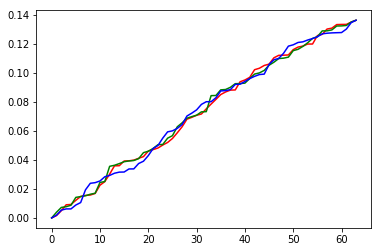

In [16]:
# input sequence generator
length=64
real=np.random.rand(length)
img=np.random.rand(length)
x=real+1j*img
x=np.matrix(x)
x=np.transpose(x)
color=['r','g','b']
for i in range(0,3,1):
    X=generalised_transform(i,x)
    print(X)
    err=mse(i,x,X,length)
    print(err.shape)
    plt.plot(np.arange(0,length,1),err,color[i])

#y=generalised_inverse_transform(0,X)

